In [1]:
# Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,roc_curve, auc ,accuracy_score,cohen_kappa_score,confusion_matrix,classification_report,recall_score,precision_score
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
import sklearn.feature_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
import pandas_profiling
from sklearn.metrics import mean_absolute_error
from pandas.plotting import scatter_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction import FeatureHasher
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import ExtraTreesRegressor

In [3]:
# Loading train dataset

In [4]:
df_train=pd.read_csv("C://Users//acer//Desktop//Intern//Guess The Product//Guess The Product//train_set.csv")

In [5]:
# shape of train set

In [6]:
df_train.shape

(5288, 6)

In [7]:
# A few rows from top

In [8]:
df_train.head(5)

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15001,VENDOR-1676,GL-6100410,83.24,Artworking/Typesetting Production Jun 2009 Cha...,CLASS-1963
1,15002,VENDOR-1883,GL-2182000,51.18,Auto Leasing Corporate Services Corning Inc /N...,CLASS-1250
2,15004,VENDOR-1999,GL-6050100,79.02,Store Management Lease/Rent Deltona Corp Real ...,CLASS-1274
3,15005,VENDOR-1771,GL-6101400,48.50,Store Construction General Requirements Coloni...,CLASS-1522
4,15006,VENDOR-1331,GL-2182000,63.35,Jul 2015 Aydin Corp Contingent Labor/Temp Labo...,CLASS-1376


In [9]:
# Loading test dataset

In [10]:
df_test=pd.read_csv("C://Users//acer//Desktop//Intern//Guess The Product//Guess The Product//test_set.csv")

In [11]:
# shape of test dataset

In [12]:
df_test.shape

(278, 6)

In [13]:
# a few rows from test data set

In [14]:
df_test.head(5)

,Inv_Id,Vendor_Code,GL_Code,Inv_Amt,Item_Description,Product_Category
0,15041,VENDOR-1181,GL-6050100,88.80,Base Rent Store Management Aig Equity Sales Co...,NaN
1,15094,VENDOR-1554,GL-6100410,80.08,Prototype and Comp Production/Packaging Design...,NaN
2,15112,VENDOR-1513,GL-6050310,24.23,Ground Transportation Travel and Entertainment...,NaN
3,15179,VENDOR-1044,GL-6101400,38.85,Store Construction General Requirements Advanc...,NaN
4,15212,VENDOR-1114,GL-6050310,94.15,Travel and Entertainment Miscellaneous Company...,NaN


In [15]:
# A brief summary of train dataset

In [16]:
pd.DataFrame({"Total missing":df_train.isna().sum(),"% missing":df_train.isna().mean(),"DataType":df_train.dtypes,"Unique":df_train.nunique()})

,Total missing,% missing,DataType,Unique
Inv_Id,0,0.0,int64,5288
Vendor_Code,0,0.0,object,1206
GL_Code,0,0.0,object,9
Inv_Amt,0,0.0,float64,4099
Item_Description,0,0.0,object,5281
Product_Category,0,0.0,object,36


In [17]:
# A brief summary of test dataset

In [18]:
pd.DataFrame({"Total missing":df_test.isna().sum(),"% missing":df_test.isna().mean(),"DataType":df_test.dtypes,"Unique":df_test.nunique()})

,Total missing,% missing,DataType,Unique
Inv_Id,0,0.0,int64,278
Vendor_Code,0,0.0,object,164
GL_Code,0,0.0,object,9
Inv_Amt,0,0.0,float64,278
Item_Description,0,0.0,object,278
Product_Category,278,1.0,float64,0


In [19]:
# Lets change the case of variable name to lower 

In [20]:
df_train.columns=map(str.lower,df_train.columns)

In [21]:
df_test.columns=map(str.lower,df_test.columns)

In [22]:
# we have no missing data in train dataset, 278 misssing in product_category is from test dataset that we have to predict

In [23]:
# Lets do processing each variale individually

In [24]:
# inv_id

In [25]:
df_train.inv_id.head(5)

0    15001
1    15002
2    15004
3    15005
4    15006
Name: inv_id, dtype: int64

In [26]:
# Invoice id is same alike index or serial no ,which cannot impact on predicting target variable,dropping this variable from 

In [27]:
df_train.drop("inv_id",axis=1,inplace=True)

In [28]:
df_test.drop("inv_id",axis=1,inplace=True)

In [29]:
# vendor code

In [30]:
df_train.vendor_code.head(5)

0    VENDOR-1676
1    VENDOR-1883
2    VENDOR-1999
3    VENDOR-1771
4    VENDOR-1331
Name: vendor_code, dtype: object

In [31]:
# vendor code can be thought of an identity number given to vendors

In [32]:
df_train[["vend","vend_code"]]=df_train.vendor_code.str.split("-",expand=True)

In [33]:
df_test[["vend","vend_code"]]=df_test.vendor_code.str.split("-",expand=True)

In [34]:
# Encoding vendor as 0

In [35]:
le=LabelEncoder()
df_train["vend"]=le.fit_transform(df_train["vend"])

In [36]:
le=LabelEncoder()
df_test["vend"]=le.fit_transform(df_test["vend"])

In [37]:
# changing the data type of vend_code from object to int

In [38]:
df_train["vend_code"]=df_train.vend_code.astype(int)

In [39]:
df_test["vend_code"]=df_test.vend_code.astype(int)

In [40]:
# dropping vendor_code column as we have extracted all required info from that col

In [41]:
df_train.drop("vendor_code",axis=1,inplace=True)

In [42]:
df_test.drop("vendor_code",axis=1,inplace=True)

In [43]:
# GL_code

In [44]:
df_train.gl_code.head(5)

0    GL-6100410
1    GL-2182000
2    GL-6050100
3    GL-6101400
4    GL-2182000
Name: gl_code, dtype: object

In [45]:
# splitting the column 

In [46]:
df_train[["gl","gl_id"]]=df_train.gl_code.str.split("-",expand=True)

In [47]:
df_test[["gl","gl_id"]]=df_test.gl_code.str.split("-",expand=True)

In [48]:
# encoding gl as 1

In [49]:
df_train.gl.replace("GL",1,inplace=True)

In [50]:
df_test.gl.replace("GL",1,inplace=True)

In [51]:
# changing the data type of gl_id

In [52]:
df_train["gl_id"]=df_train.gl_id.astype(int)

In [53]:
df_test["gl_id"]=df_test.gl_id.astype(int)

In [54]:
# Dropping gl_code as we have extracted required info from that col

In [55]:
df_train.drop("gl_code",axis=1,inplace=True)

In [56]:
df_test.drop("gl_code",axis=1,inplace=True)

In [57]:
# Inv_amt

In [58]:
df_train.inv_amt.head(5)

0    83.24
1    51.18
2    79.02
3    48.50
4    63.35
Name: inv_amt, dtype: float64

In [59]:
# no need to process as it is already in int datatype and contains no missing values

In [60]:
# item description

In [61]:
df_train.item_description.head(5)

0    Artworking/Typesetting Production Jun 2009 Cha...
1    Auto Leasing Corporate Services Corning Inc /N...
2    Store Management Lease/Rent Deltona Corp Real ...
3    Store Construction General Requirements Coloni...
4    Jul 2015 Aydin Corp Contingent Labor/Temp Labo...
Name: item_description, dtype: object

In [62]:
# item description is already described and encoded by gl_code column, dropping this column 

In [63]:
df_train.drop("item_description",axis=1,inplace=True)

In [64]:
df_test.drop("item_description",axis=1,inplace=True)

In [65]:
# Lets encode the target variable product category

In [66]:
df_train.product_category.head(5)

0    CLASS-1963
1    CLASS-1250
2    CLASS-1274
3    CLASS-1522
4    CLASS-1376
Name: product_category, dtype: object

In [67]:
len(df_train.product_category.unique())

36

In [68]:
le=LabelEncoder()
df_train["product_category"]=le.fit_transform(df_train.product_category)

In [69]:
df_train.product_category.unique()

array([25,  2,  3, 10,  7, 15, 32,  8, 12,  1, 14, 22, 18, 31, 11,  5,  9,
       17, 23,  6, 19, 20, 28,  0, 26, 35, 21, 27,  4, 13, 30, 16, 34, 33,
       24, 29], dtype=int64)

In [70]:
# lets see the train dataset

In [71]:
df_train.head(5)

,inv_amt,product_category,vend,vend_code,gl,gl_id
0,83.24,25,0,1676,1,6100410
1,51.18,2,0,1883,1,2182000
2,79.02,3,0,1999,1,6050100
3,48.50,10,0,1771,1,6101400
4,63.35,7,0,1331,1,2182000


In [72]:
# lets see test dataset

In [73]:
df_test.head(5)

,inv_amt,product_category,vend,vend_code,gl,gl_id
0,88.80,NaN,0,1181,1,6050100
1,80.08,NaN,0,1554,1,6100410
2,24.23,NaN,0,1513,1,6050310
3,38.85,NaN,0,1044,1,6101400
4,94.15,NaN,0,1114,1,6050310


In [74]:
# Data visualization 

In [75]:
# dist plot

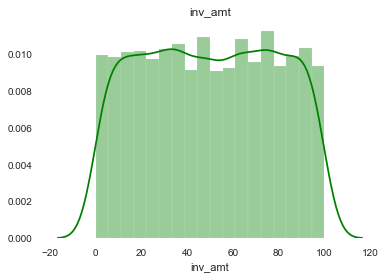

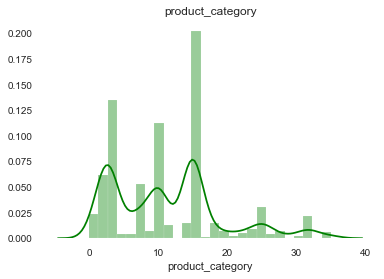

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


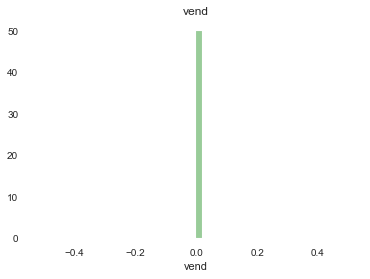

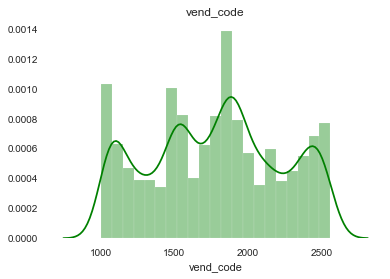

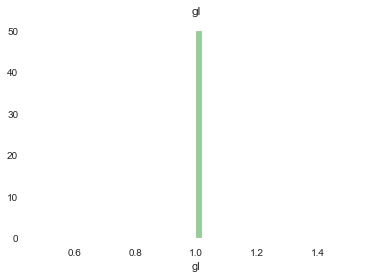

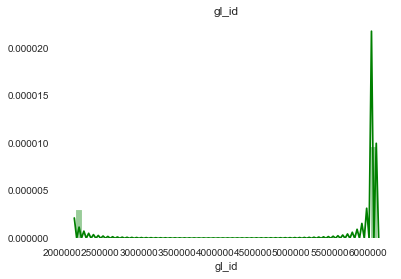

In [76]:
for feature in df_train.columns:
    data=df_train.copy()
    sns.distplot(data[feature],color="green")
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

In [77]:
# histogram

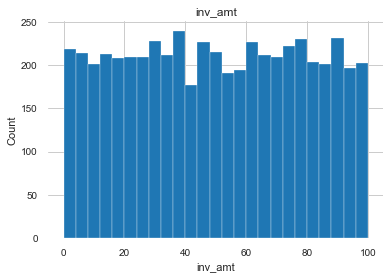

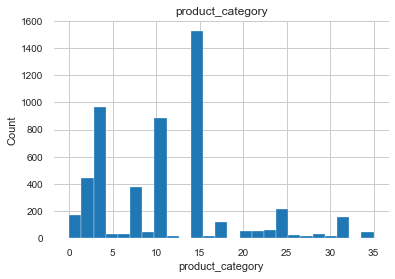

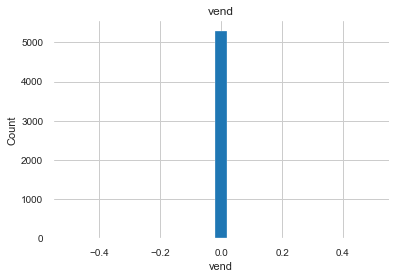

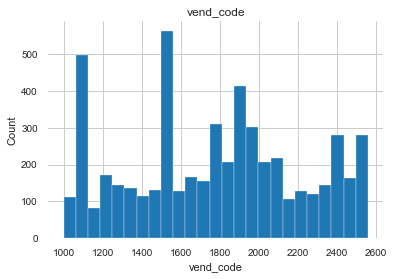

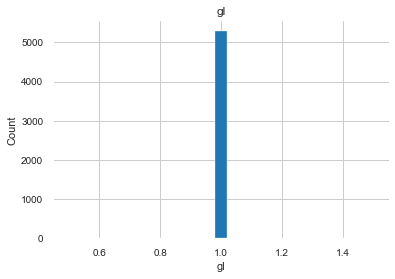

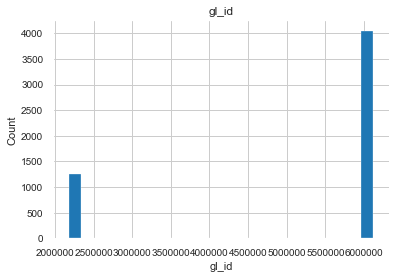

In [78]:
for feature in df_train.columns:
    data=df_train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [79]:
# dist plot 

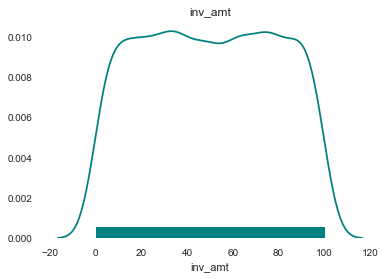

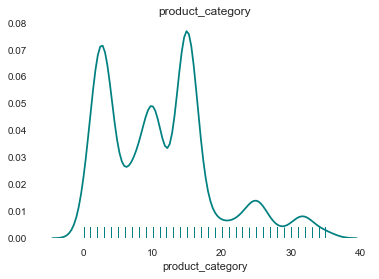

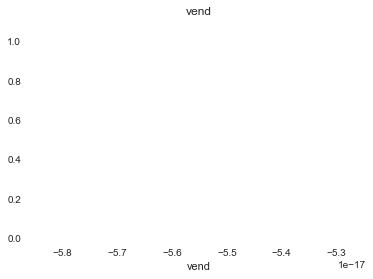

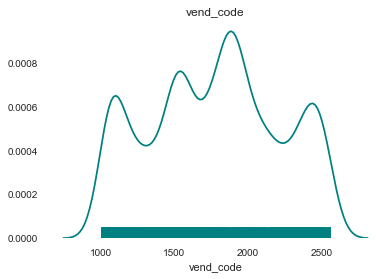

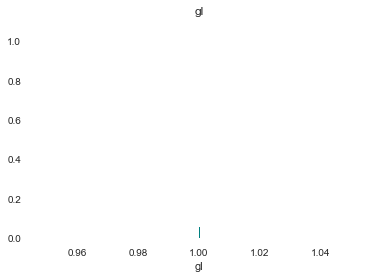

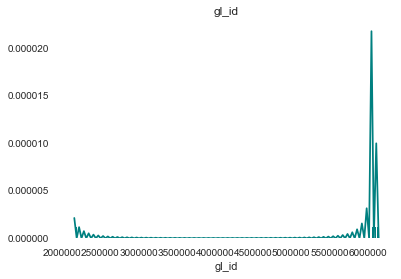

In [80]:
for feature in df_train.columns:
    data=df_train.copy()
    sns.distplot(data[feature],color="teal",hist=False,rug=True)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

In [81]:
# KDE plot

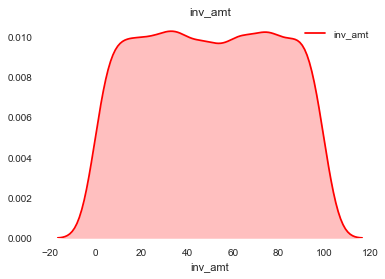

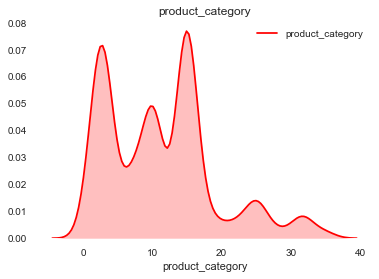

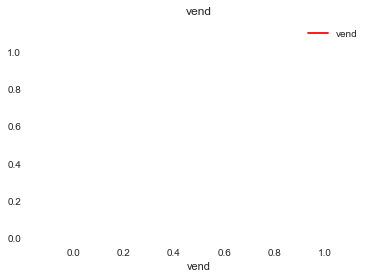

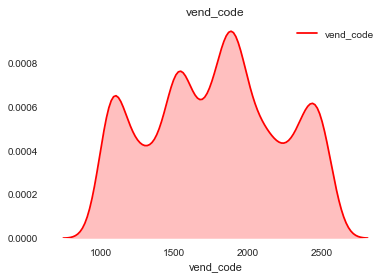

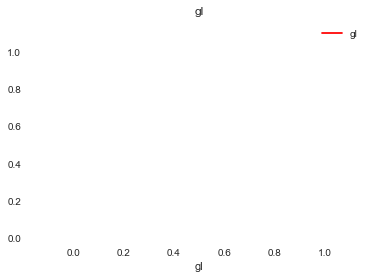

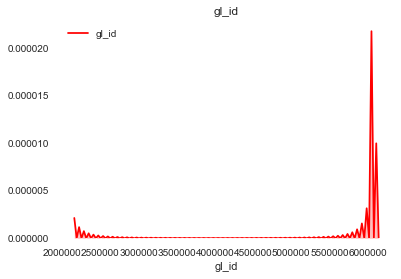

In [82]:
for feature in df_train.columns:
    data=df_train.copy()
    sns.kdeplot(data[feature],shade=True,color="red")
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

In [83]:
# Bivariate analysis

In [84]:
# joint plot

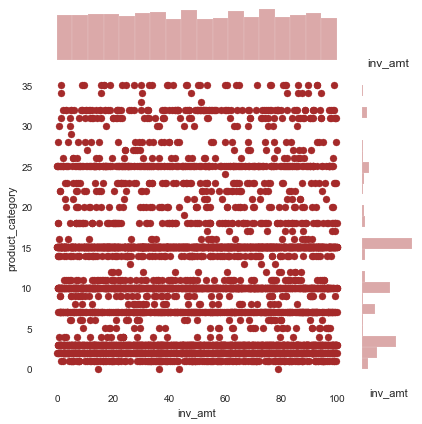

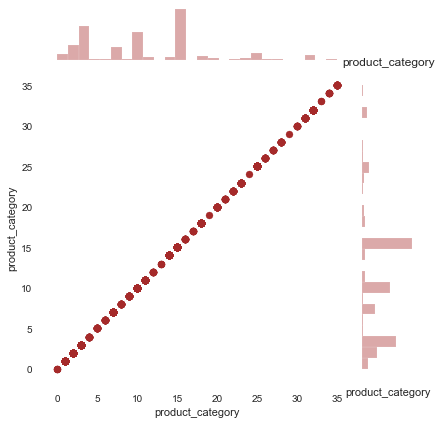

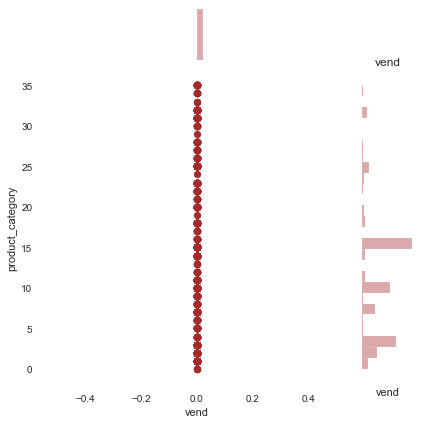

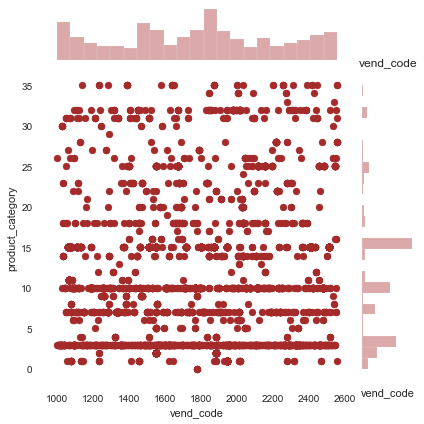

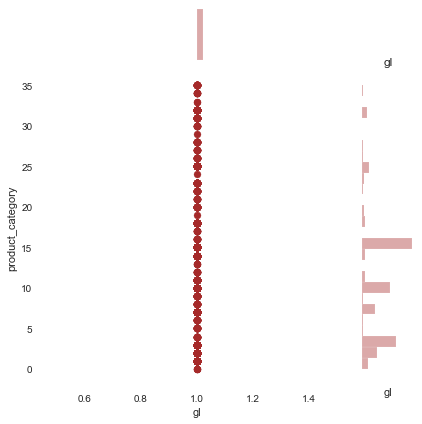

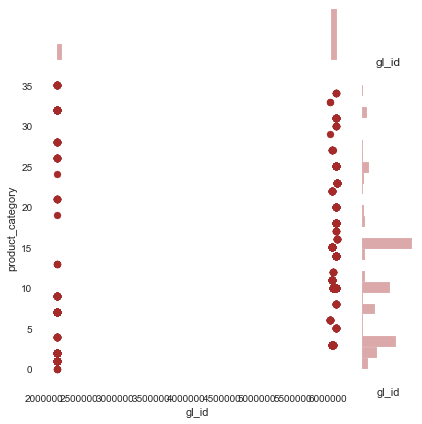

In [85]:
for feature in df_train.columns:
    data=df_train.copy()
    sns.jointplot(data[feature],color="brown",y=data["product_category"],data=data)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

In [86]:
# Heat map

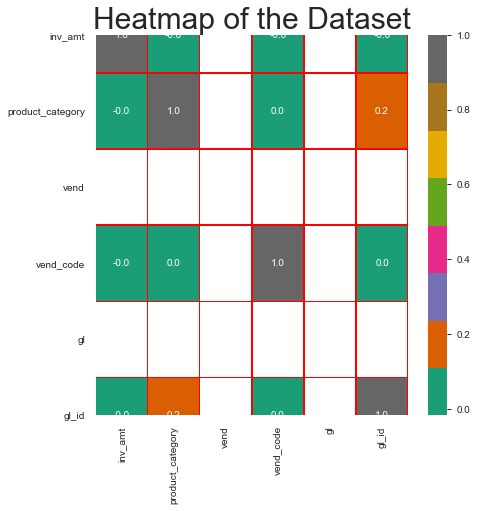

In [87]:
plt.rcParams['figure.figsize'] = (7, 7)
sns.heatmap(df_train.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',cmap="Dark2")
plt.title('Heatmap of the Dataset', fontsize = 30)
plt.show()

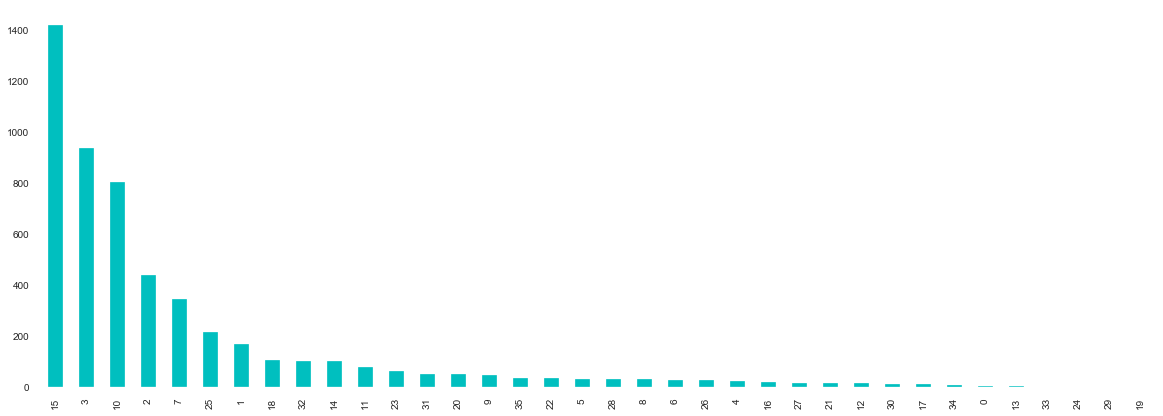

In [88]:
df_train['product_category'].value_counts().head(70).plot.bar(color = 'c', figsize = (20, 7))

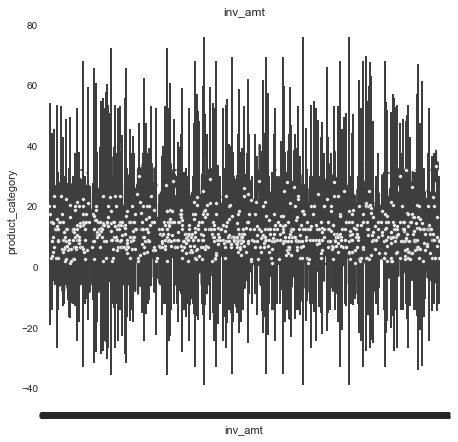

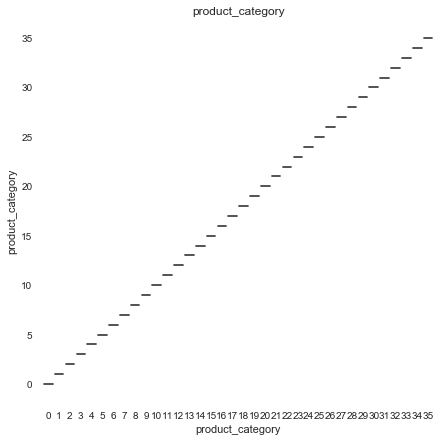

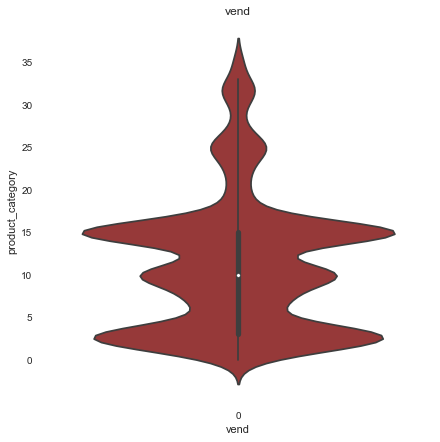

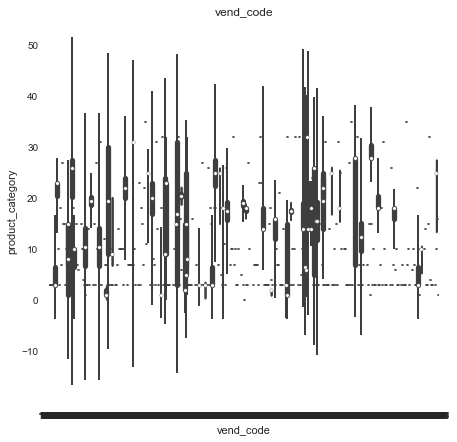

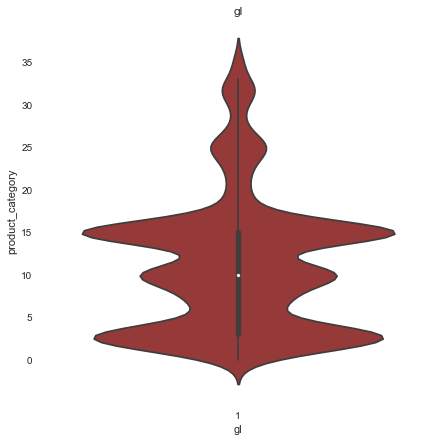

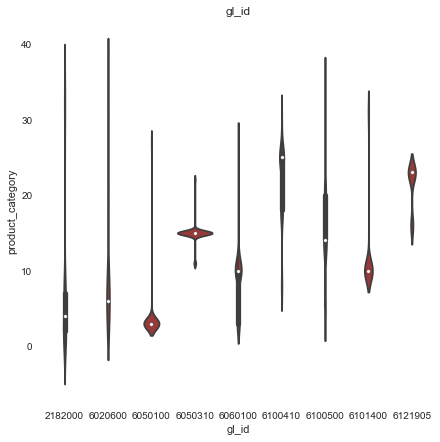

In [89]:
for feature in df_train.columns:
    data=df_train.copy()
    sns.violinplot(data[feature],color="brown",y=data["product_category"],data=data)
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()


In [90]:
# Boxplot

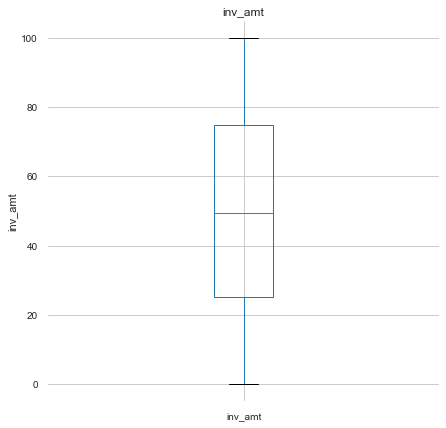

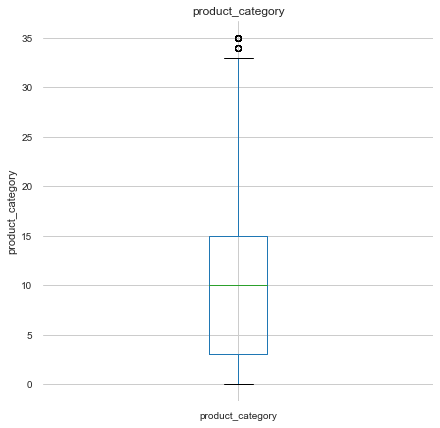

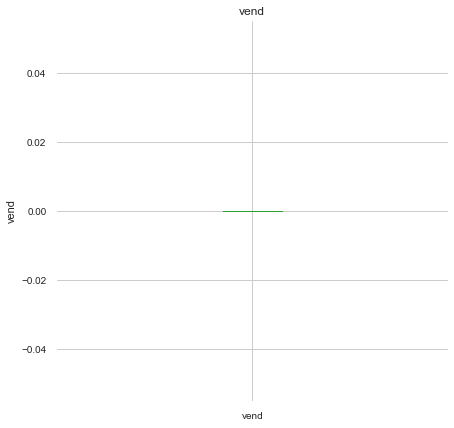

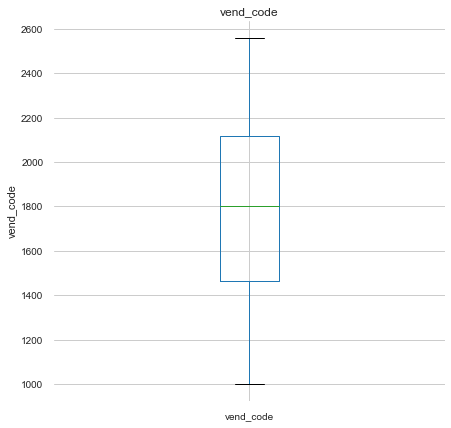

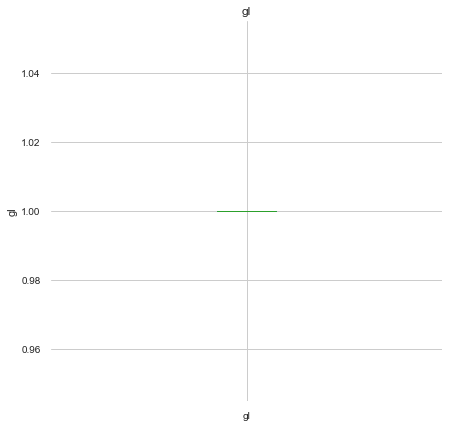

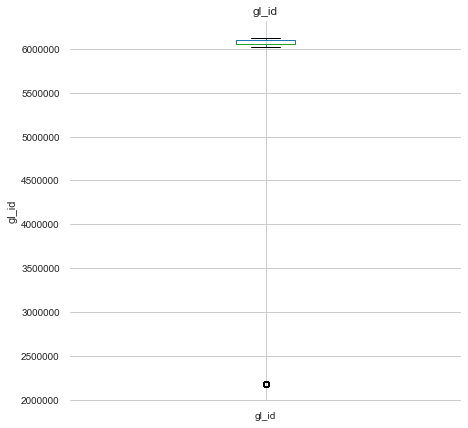

In [91]:
for feature in df_train.columns:
    data=df_train.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [92]:
# Lets split training dataset into dependent and independent dataset

In [93]:
y=df_train["product_category"]
x=df_train.drop("product_category",axis=1)

In [94]:
# Lets check feature importance 

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.10383293 0.         0.33165346 0.         0.56451361]


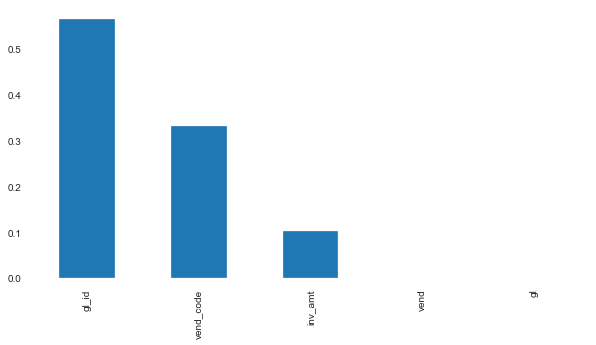

In [95]:
fig=plt.figure(figsize=(10,5))
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='bar')
plt.show()

In [96]:
# by looking at the above bar we can say that vendor and gl are not at all important, we can drop them

In [97]:
x.drop("gl",axis=1,inplace=True)

In [98]:
x.drop("vend",axis=1,inplace=True)

In [99]:
# Variance Inflation factor

In [100]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [101]:
vif

,VIF Factor,features
0,3.565357,inv_amt
1,7.980735,vend_code
2,7.241560,gl_id


In [102]:
# splitting the dataset using train test split

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [104]:
# Printing the shape of splitted dataset

In [105]:
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (3701, 3)
shape of y_train: (3701,)
shape of x_test: (1587, 3)
shape of y_test: (1587,)


In [106]:
# Applying machine learning algorithm on train dataset

In [107]:
# Extra trees classifier

In [108]:
etc=ExtraTreesClassifier(n_estimators=100)
etc.fit(x_train,y_train)
prediction=etc.predict(x_test)

In [109]:
# Looking at the output 

In [110]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

      Act  Predicted
422    15         15
1253    3          3
2379    2          2
4540   15         15
5176   10         10
...   ...        ...
4487   15         15
5146   10         10
330    15         15
3979    2          2
4445   15         15

[1587 rows x 2 columns]


In [111]:
# Evaluating result 

In [112]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.8657844990548205
Kappa is : 0.8418050355672033
Sensitiviy is : 0.8657844990548205
Precision is : 0.8657844990548205
R2 score is: 0.4449579220253116
array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,  38,   2, ...,   5,   0,   0],
       [  0,   0, 129, ...,   0,   0,   0],
       ...,
       [  0,   2,   4, ...,  10,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   1,   0,   2]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.00      0.00      0.00         1\n'
 '           1       0.76      0.75      0.75        51\n'
 '           2       0.90      1.00      0.95       129\n'
 '           3       0.96      0.97      0.96       295\n'
 '           4       0.00      0.00      0.00         8\n'
 '           5       0.78      0.50      0.61        14\n'
 '           6       1.00      0.93      0.97        15\n'
 '           7       0.70      0.73      0.72       105\n'
 '   

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [113]:
# Bagging classifier

In [114]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
prediction=bc.predict(x_test)

In [115]:
# Looking at the output 

In [116]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

      Act  Predicted
422    15         15
1253    3          3
2379    2          2
4540   15         15
5176   10         10
...   ...        ...
4487   15         15
5146   10         10
330    15         15
3979    2          2
4445   15         15

[1587 rows x 2 columns]


In [117]:
# evaluating result

In [118]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.8954001260239446
Kappa is : 0.8770808701324273
Sensitiviy is : 0.8954001260239446
Precision is : 0.8954001260239446
R2 score is: 0.5542174332241236
array([[  1,   0,   0, ...,   0,   0,   0],
       [  0,  41,   1, ...,   2,   0,   2],
       [  0,   0, 129, ...,   0,   0,   0],
       ...,
       [  0,   2,   0, ...,  16,   0,   0],
       [  0,   0,   0, ...,   0,   1,   0],
       [  0,   0,   0, ...,   0,   0,   5]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.50      1.00      0.67         1\n'
 '           1       0.85      0.80      0.83        51\n'
 '           2       0.99      1.00      1.00       129\n'
 '           3       0.98      0.98      0.98       295\n'
 '           4       0.83      0.62      0.71         8\n'
 '           5       0.50      0.43      0.46        14\n'
 '           6       1.00      0.53      0.70        15\n'
 '           7       0.78      0.79      0.79       105\n'
 '   

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [119]:
# applying KNN

In [120]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

In [121]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

      Act  Predicted
422    15         15
1253    3          3
2379    2          2
4540   15         15
5176   10         10
...   ...        ...
4487   15         15
5146   10         10
330    15         15
3979    2          2
4445   15         15

[1587 rows x 2 columns]


In [122]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.8701953371140516
Kappa is : 0.847062692591437
Sensitiviy is : 0.8701953371140516
Precision is : 0.8701953371140516
R2 score is: 0.4800509319810211
array([[  1,   0,   0, ...,   0,   0,   0],
       [  0,  40,   1, ...,   3,   0,   0],
       [  0,   0, 129, ...,   0,   0,   0],
       ...,
       [  0,   5,   1, ...,  11,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   1]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.33      1.00      0.50         1\n'
 '           1       0.68      0.78      0.73        51\n'
 '           2       0.94      1.00      0.97       129\n'
 '           3       0.98      0.97      0.97       295\n'
 '           4       0.00      0.00      0.00         8\n'
 '           5       0.71      0.71      0.71        14\n'
 '           6       1.00      1.00      1.00        15\n'
 '           7       0.71      0.75      0.73       105\n'
 '    

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [123]:
# applying random forest

In [124]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)

In [125]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

      Act  Predicted
422    15         15
1253    3          3
2379    2          2
4540   15         15
5176   10         10
...   ...        ...
4487   15         15
5146   10         10
330    15         15
3979    2          2
4445   15         15

[1587 rows x 2 columns]


In [126]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.8790170132325141
Kappa is : 0.8574323467581608
Sensitiviy is : 0.8790170132325141
Precision is : 0.8790170132325141
R2 score is: 0.49241027427861095
array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,  38,   1, ...,   3,   0,   0],
       [  0,   0, 129, ...,   0,   0,   0],
       ...,
       [  0,   1,   0, ...,  12,   0,   1],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   1,   0,   1]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       0.00      0.00      0.00         1\n'
 '           1       0.76      0.75      0.75        51\n'
 '           2       0.97      1.00      0.98       129\n'
 '           3       0.97      0.97      0.97       295\n'
 '           4       1.00      0.25      0.40         8\n'
 '           5       0.86      0.43      0.57        14\n'
 '           6       1.00      0.93      0.97        15\n'
 '           7       0.66      0.77      0.71       105\n'
 '  

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [127]:
# applying CART

In [128]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth=20)
dt.fit(x_train,y_train)
prediction=dt.predict(x_test)

In [129]:
output=pd.DataFrame({"Act":y_test,"Predicted":prediction})
print(output)

      Act  Predicted
422    15         15
1253    3          3
2379    2          2
4540   15         15
5176   10         10
...   ...        ...
4487   15         15
5146   10         10
330    15         15
3979    2          2
4445   15         15

[1587 rows x 2 columns]


In [130]:
print("accuracy score is {}".format(accuracy_score(y_test,prediction)))
print("Kappa is :",cohen_kappa_score(y_test,prediction))
print("Sensitiviy is :",recall_score(y_test, prediction,pos_label="positive",average="micro"))
print("Precision is :",precision_score(y_test, prediction,pos_label="positive",average="micro"))
print("R2 score is:",r2_score(y_test,prediction))
# fpr, tpr, thresholds = roc_curve(y_test,prediction)
# print("Area under curve is  :{}".format(auc(fpr,tpr)))
pprint(confusion_matrix(y_test, prediction))
pprint(classification_report(y_test, prediction))

accuracy score is 0.9048519218651544
Kappa is : 0.8884379299027242
Sensitiviy is : 0.9048519218651544
Precision is : 0.9048519218651544
R2 score is: 0.537940294340231
array([[  1,   0,   0, ...,   0,   0,   0],
       [  0,  41,   1, ...,   0,   0,   2],
       [  0,   0, 129, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   2,   0],
       [  0,   0,   0, ...,   0,   0,   5]], dtype=int64)
('              precision    recall  f1-score   support\n'
 '\n'
 '           0       1.00      1.00      1.00         1\n'
 '           1       0.91      0.80      0.85        51\n'
 '           2       0.99      1.00      1.00       129\n'
 '           3       1.00      0.97      0.98       295\n'
 '           4       0.83      0.62      0.71         8\n'
 '           5       0.60      0.43      0.50        14\n'
 '           6       1.00      0.80      0.89        15\n'
 '           7       0.82      0.78      0.80       105\n'
 '    

c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1259: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
c:\users\acer\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [131]:
# We can use either CART or Bagging classifier on test data as they both fit data well

In [132]:
# Lets drop target variable from test dataset

In [133]:
df_test.drop("product_category",axis=1,inplace=True)

In [134]:
# dropping gl and vendor from test dataset

In [135]:
df_test.drop("gl",axis=1,inplace=True)
df_test.drop("vend",axis=1,inplace=True)

In [136]:
# Looking at the test dataset

In [137]:
df_test.head(5)

,inv_amt,vend_code,gl_id
0,88.80,1181,6050100
1,80.08,1554,6100410
2,24.23,1513,6050310
3,38.85,1044,6101400
4,94.15,1114,6050310


In [138]:
# applying cart on test dataset

In [139]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth=20)
dt.fit(x,y)
prediction=dt.predict(df_test)

In [140]:
# displaying result

In [141]:
pd.DataFrame({"Predicted output":prediction})

,Predicted output
0,3
1,25
2,15
3,10
4,15
...,...
273,15
274,15
275,25
276,7


In [142]:
# applying Bagging classifier

In [143]:
bc=BaggingClassifier()
bc.fit(x,y)
prediction=bc.predict(df_test)

In [144]:
# displaying result

In [145]:
pd.DataFrame({"Predicted output":prediction})

,Predicted output
0,3
1,25
2,15
3,10
4,15
...,...
273,15
274,15
275,25
276,7


In [146]:
pd.DataFrame({"Encoded values":prediction,"Real category":le.inverse_transform(prediction)})

,Encoded values,Real category
0,3,CLASS-1274
1,25,CLASS-1963
2,15,CLASS-1758
3,10,CLASS-1522
4,15,CLASS-1758
...,...,...
273,15,CLASS-1758
274,15,CLASS-1758
275,25,CLASS-1963
276,7,CLASS-1376


In [147]:
# Converting back to original category as the output should be as per question asked

In [148]:
test=pd.read_csv("C://Users//acer//Desktop//Intern//Guess The Product//Guess The Product//test_set.csv")

In [149]:
final_prediction=pd.DataFrame({"Inv_id":test["Inv_Id"],"Product_Category":le.inverse_transform(prediction)})

In [150]:
final_prediction.to_csv("Product category.csv",index=False)

In [151]:
# Thank you